In [10]:
!pip install lightgbm
!pip install optuna
!pip install scikit-posthocs

In [11]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import optuna
import scipy.stats as stats
from itertools import combinations
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
import scikit_posthocs as sp
import math
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import OPTICS
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import datetime

In [12]:
# Read .csv
x_data = pd.read_csv('X_NorthAmerica.csv')
y_data = pd.read_csv('Y_NorthAmerica.csv', parse_dates=['EventDate'])

In [13]:
x_data.shape[0]

2753077

In [15]:
# Drop NA
x_data.dropna(inplace=True)
y_data.dropna(inplace=True)
x_data.shape[0]

2240223

In [16]:
# X_data overview
x_data.head()

,CompNo,yyyy,mm,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,ni2tatrend,sizelevel,sizetrend,m2b,sigma,liqfinlevel,lqfintrend,DTDmedianFin,DTDmedianNonFin,dummy297fin
4,15984000.0,1999.0,7,0.162536,0.007322,4.190356,0.000000,0.447325,0.000000e+00,0.00932,0.0,1.336588,-0.103719,4.504762,0.259755,0.0,0.0,0.0,2.455596,0
5,15984000.0,1999.0,8,0.379335,0.008205,4.728923,0.538567,0.447325,5.551115e-17,0.00932,0.0,1.334071,-0.012588,5.157557,0.241380,0.0,0.0,0.0,2.459940,0
6,15984000.0,1999.0,9,0.261256,0.007744,4.779150,0.100454,0.447325,0.000000e+00,0.00932,0.0,1.352565,0.110965,6.072565,0.238643,0.0,0.0,0.0,2.499298,0
7,15984000.0,1999.0,10,0.255081,0.008686,4.872708,0.280674,0.447325,0.000000e+00,0.00932,0.0,1.357898,0.037333,5.902303,0.231512,0.0,0.0,0.0,2.506355,0
8,15984000.0,1999.0,11,0.193601,0.009534,4.932789,0.240323,0.447325,-5.551115e-17,0.00932,0.0,1.354015,-0.031063,5.509578,0.223494,0.0,0.0,0.0,2.569107,0


In [17]:
x_data.describe()

,CompNo,yyyy,mm,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,ni2tatrend,sizelevel,sizetrend,m2b,sigma,liqfinlevel,lqfintrend,DTDmedianFin,DTDmedianNonFin,dummy297fin
count,2.240223e+06,2.240223e+06,2.240223e+06,2.240223e+06,2.240223e+06,2.240223e+06,2.240223e+06,2.240223e+06,2.240223e+06,2.240223e+06,2.240223e+06,2.240223e+06,2.240223e+06,2.240223e+06,2.240223e+06,2.240223e+06,2.240223e+06,2.240223e+06,2.240223e+06,2.240223e+06
mean,5.299929e+07,2.006611e+03,6.475939e+00,9.145814e-02,-1.194503e-03,4.232771e+00,-9.837584e-02,6.389015e-01,-1.808907e-02,-6.966205e-03,-7.606348e-05,2.568613e-01,-1.200630e-02,1.692206e+00,1.758659e-01,-6.725415e-01,-4.163330e-03,6.087099e-01,2.728597e+00,2.037400e-01
std,4.414220e+07,9.204979e+00,3.445400e+00,1.710893e-01,8.375221e-03,6.123284e+00,1.844615e+00,8.759310e-01,3.222118e-01,5.007148e-02,3.602537e-02,2.044275e+00,3.519819e-01,3.656951e+00,1.279068e-01,1.471287e+00,2.473951e-01,1.305775e+00,1.590332e+00,4.027779e-01
min,7.998001e+06,1.991000e+03,1.000000e+00,-5.455788e-01,-1.209741e-02,-1.113511e+00,-3.534109e+01,-4.156714e+00,-2.559415e+00,-1.324832e+00,-6.009485e-01,-6.176606e+00,-1.923094e+00,1.522917e-01,9.676512e-03,-9.793003e+00,-3.436180e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.039200e+07,1.999000e+03,3.000000e+00,8.192971e-03,-1.023988e-02,1.987536e+00,-5.717070e-01,0.000000e+00,-8.458817e-02,-4.188045e-03,-1.977635e-03,-1.195502e+00,-1.666245e-01,7.706763e-01,8.806475e-02,0.000000e+00,0.000000e+00,0.000000e+00,2.170351e+00,0.000000e+00
50%,3.754000e+07,2.006000e+03,6.000000e+00,1.059990e-01,-2.336409e-03,3.364040e+00,-2.371697e-02,4.986695e-01,0.000000e+00,1.228540e-03,3.302870e-07,1.506468e-01,-3.942945e-03,1.004851e+00,1.406088e-01,0.000000e+00,0.000000e+00,0.000000e+00,3.099969e+00,0.000000e+00
75%,4.823600e+07,2.015000e+03,9.000000e+00,2.009715e-01,7.548697e-03,5.208585e+00,4.854818e-01,1.108736e+00,5.417996e-02,5.103349e-03,2.073047e-03,1.602045e+00,1.556317e-01,1.609550e+00,2.236475e-01,0.000000e+00,0.000000e+00,0.000000e+00,3.845747e+00,0.000000e+00
max,2.117300e+08,2.023000e+03,1.200000e+01,7.133805e-01,2.617982e-02,1.146545e+02,1.493372e+01,4.787727e+00,2.683886e+00,2.160935e-01,6.366733e-01,6.752074e+00,2.018934e+00,9.809361e+01,1.124798e+00,0.000000e+00,3.392903e+00,5.790361e+00,5.578428e+00,1.000000e+00


In [18]:
# Y_data Overview
y_data.head()

,CompNo,EventDate,Event_type,Sector_Number,Exchange,Time_Begin
0,15984000,2008-10-17,1,11.0,15,19990315
1,18729000,2023-07-31,0,17.0,15,20210128
2,22043000,2023-07-31,0,16.0,15,20150826
3,22043001,2013-04-30,2,16.0,15,20040927
4,26978000,2023-07-31,0,17.0,15,20090505


In [19]:
y_data["Event_type"]

0        1
1        0
2        0
3        2
4        0
        ..
27383    0
27384    0
27385    0
27386    0
27387    0
Name: Event_type, Length: 27164, dtype: int64

c:\Documents\Capstone\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Documents\Capstone\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Documents\Capstone\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Documents\Capstone\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.

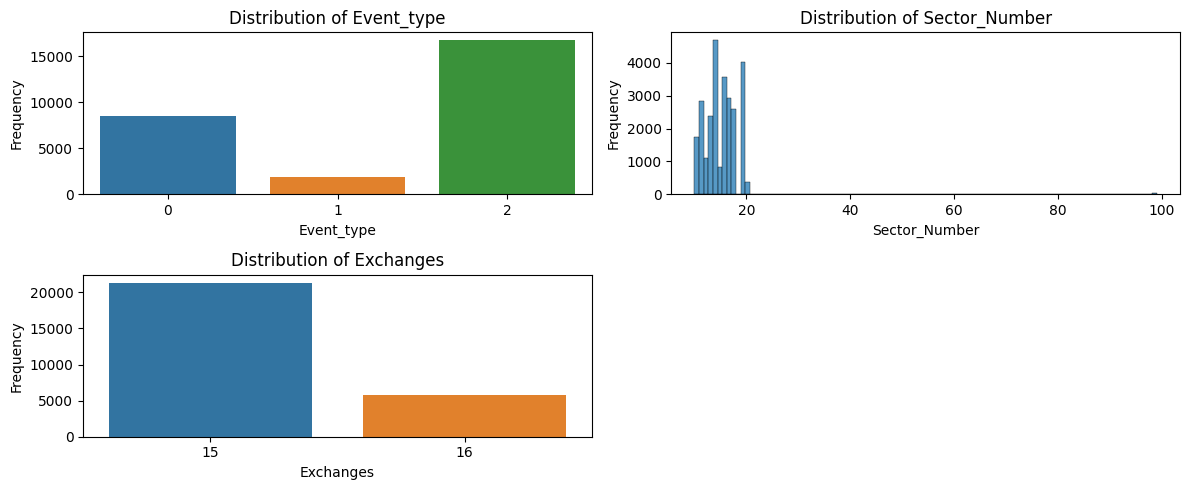

In [20]:
# Plotting distribution of Event_type and Sector_Number
plt.figure(figsize=(12, 5))

# Event_type distribution
plt.subplot(2, 2, 1)
sns.countplot(x=y_data['Event_type'])
plt.title('Distribution of Event_type')
plt.xlabel('Event_type')
plt.ylabel('Frequency')

# Sector_Number distribution
plt.subplot(2, 2, 2)
sns.histplot(y_data['Sector_Number'], bins=100, kde=False)
plt.title('Distribution of Sector_Number')
plt.xlabel('Sector_Number')
plt.ylabel('Frequency')

# Sector_Number distribution
plt.subplot(2, 2, 3)
sns.countplot(x=y_data['Exchange'])
plt.title('Distribution of Exchanges')
plt.xlabel('Exchanges')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [22]:
#Assuming 0 is the "no default event" and 2 is the "exit but not default event", we just forget about them and keep only "1"  values that will allow us to determine rather or not a company go default
y_data.drop(y_data[y_data['Event_type'] == 0].index, inplace = True)
y_data.drop(y_data[y_data['Event_type'] == 2].index, inplace = True)
y_data.shape[0]

1869

In [23]:
# Merge X and Y (12 months predictions)
default = []
xy_data = x_data.copy()

In [30]:
len(xy_data)

2240223

In [31]:
for index, row in xy_data.iterrows():
    if index % 1000000 == 0:
        print(index)
    if row['yyyy'] == '2e3':
        year = 2000
    else:
        year = int(row['yyyy'])
    month = int(row['mm'])
    date = datetime.datetime(year, month, 1)
    date = date + pd.DateOffset(months=1) + pd.DateOffset(days=-1) # make it the last day of the same month
    one_year_later = date + pd.DateOffset(years=1)
    # CompNo = row['CompNo']
    y_filter = y_data[(y_data["EventDate"] > date) & (y_data["EventDate"] <= one_year_later) & (y_data['CompNo'] == row['CompNo'])]
    if len(y_filter) == 0:
        default.append(0) #company did not default within the next 12 months
    else:
        default.append(1) #company defaulted within the next 12 months

xy_data["Default"] = default

KeyboardInterrupt: 

In [28]:
len(default)

2488543